<a href="https://colab.research.google.com/github/MESIBUN/ds_projects/blob/main/mini_project_2_Mark_prediction_based_on_hours_of_study_through_simpe_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the library
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#read csv file and store in dataframe
marks=pd.read_csv("student_scores.csv")

In [ ]:
marks.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
marks.shape

(25, 2)

In [ ]:
marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
marks.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#check for null value
marks.isnull().sum()

Hours     0
Scores    0
dtype: int64

array([[<Axes: title={'center': 'Hours'}>,
        <Axes: title={'center': 'Scores'}>]], dtype=object)

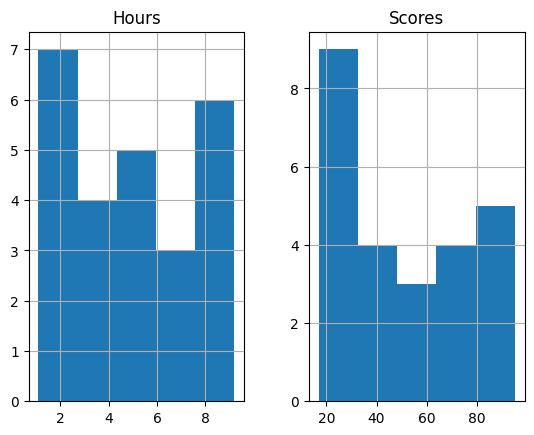

In [ ]:
#visualize the distirubtion
marks.hist(bins=5)

In [ ]:
#correlation between columns
marks.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [ ]:
#return a numpy array
X=marks["Hours"].values.reshape(-1,1)
Y=marks["Scores"].values.reshape(-1,1)

In [ ]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
Y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [ ]:
X.shape ,Y.shape

((25, 1), (25, 1))

Text(0, 0.5, 'Scores')

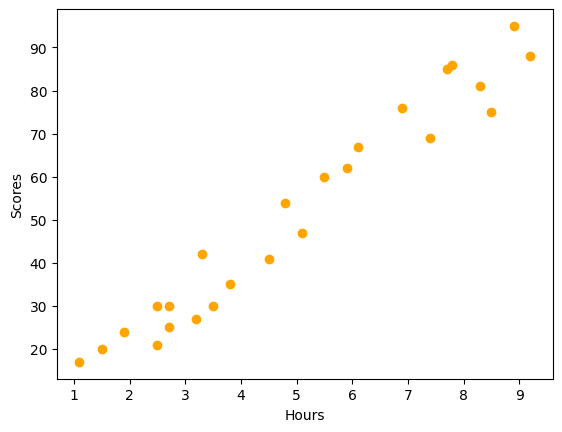

In [ ]:
plt.scatter(X,Y,color='orange')
plt.xlabel("Hours")
plt.ylabel("Scores")

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.20,random_state=42)
print("xtrain",xtrain.shape)
print("xtest",xtest.shape)
print("ytrain",xtrain.shape)
print("ytest",ytest.shape)

xtrain (20, 1)
xtest (5, 1)
ytrain (20, 1)
ytest (5, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [ ]:
ytest

array([[81],
       [30],
       [21],
       [76],
       [62]])

In [ ]:
ypred

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

Text(0, 0.5, 'Scores')

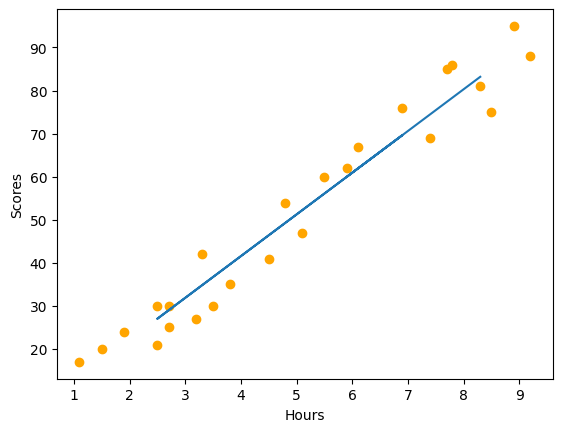

In [ ]:
plt.scatter(X,Y,color='orange')
plt.plot(xtest,ypred)
#plt.xlim(100,)
#plt.ylim(0,)
plt.xlabel("Hours")
plt.ylabel("Scores")

In [ ]:
#MAE,MSE,RMSE
#measure of spread that tells you how scattered your data is around the regression line ,measures the overall accuracy of the model

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE = ",mean_absolute_error(ytest,ypred))
print("MSE = ",mean_squared_error(ytest,ypred))

MAE =  3.9207511902099244
MSE =  18.943211722315272


In [ ]:
#Root mean Squared error
from  math import sqrt as sqrt
print("RMSE = ",sqrt(mean_squared_error(ytest,ypred)))

RMSE =  4.352380006653288


In [ ]:
r2= r2_score(ytest,ypred)
print("R^2 (coefficient of determination ) = ",r2)

R^2 (coefficient of determination ) =  0.9678055545167994


In [ ]:
#ADJUSTED R2
#p : No of predictors /independent varaibles
#N : total samples
#Adjusted R2 will always be less than or equal to R2.
N=len(ytest)
p=1

ar2=1-((1-r2)*(1-N))/(N-p-1)

print("Adjusted r2 = " , ar2)

Adjusted r2 =  1.0429259273109341


In [ ]:
#How to predict a new value that model has not seen /which was not part of the training/test set
model.predict([[9.5]])


array([[94.80663482]])

In [ ]:
model.coef_,model.intercept_

(array([[9.68207815]]), array([2.82689235]))

In [ ]:
#save the model using pickel

import pickle
pickel_m = "D:\Linear Regression 1\saved_model\linear_reg1.pkl"

with open(pickel_m, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
with open(pickel_m, 'rb') as file:
    load_model = pickle.load(file)


In [ ]:
load_model.predict([[10]])

array([[99.6476739]])